In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [307]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## এক্সপ্লোরেটরি ডেটা এনালাইসিস 

In [258]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [259]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [260]:
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    sns.set()
    df.plot(kind='bar', figsize=(10, 5))

# Data visualization

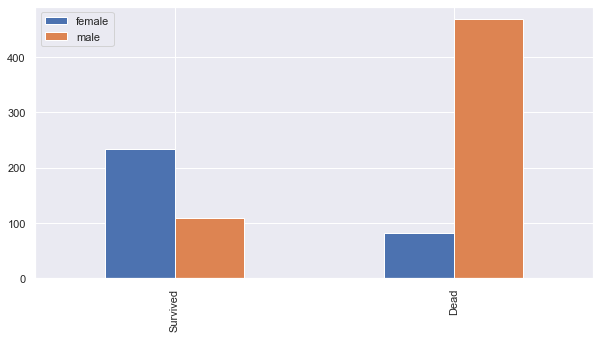

In [226]:
bar_chart('Sex')

এই চার্ট থেকে দেখা যাচ্ছে পুরুষ থেকে বেশি বেচে গেছে মহিলারা 

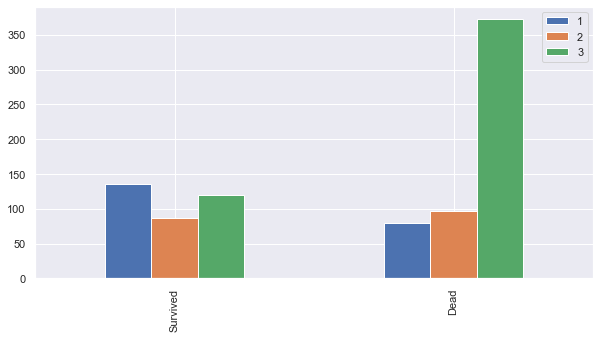

In [33]:
bar_chart('Pclass')

এখানে দেখা যাচ্ছে প্রথম শ্রেণির যাত্রীরা বেচেছে বেশি । তৃতীয় শ্রেণির যাত্রীরা মারা গেছেন বেশি। 

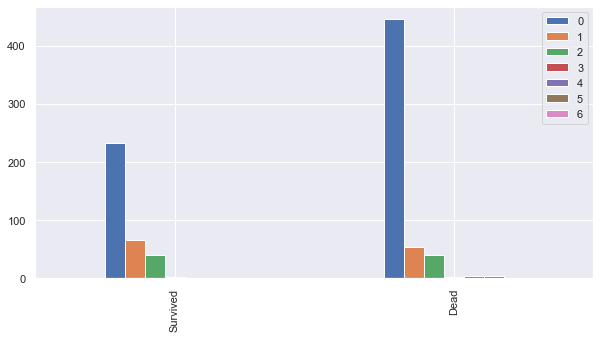

In [34]:
bar_chart('Parch')

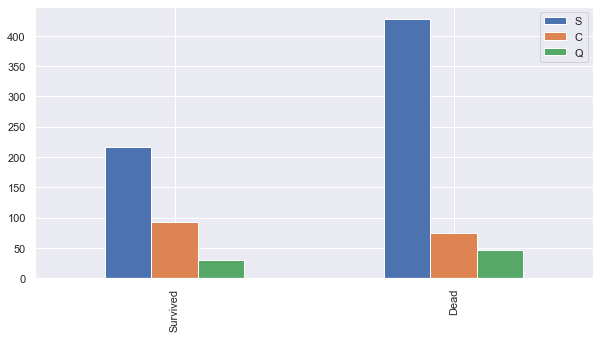

In [36]:
bar_chart('Embarked')

# Feature Engineering

In [308]:
train_test_data = [train, test]

In [309]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)
    

In [310]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Sir           1
Ms            1
Lady          1
Mme           1
Don           1
Countess      1
Jonkheer      1
Capt          1
Name: Title, dtype: int64

### টাইটেলগুলোকে সংখ্যার সাথে ম্যাপিং 

In [311]:
title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Dr': 3, 'Rev': 3, 'Mlle': 3, 'Major': 3, 'Col': 3,
                'Sir': 3, 'Ms': '3', 'Lady': 3, 'Mme': 3, 'Don': 3, 'Countess': 3, 'Jonkheer': 3, 'Capt': 3}

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [312]:
train.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S,0
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C,0
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S,2


## Delete unnecessary data

In [313]:
train.drop('Name', axis=1, inplace=True)

In [314]:
test.drop('Name', axis=1, inplace=True)

In [315]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


## মহিলা ও পুরুষকে ম্যাপিং 

In [316]:
sex_mapping = {'male': 0, 'female': 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [269]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


## বয়সের মিসিং ভ্যালু গুলোকে গড় বয়স দিয়ে পূরণ করি 

In [318]:
from sklearn.impute import SimpleImputer

In [321]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
train[['Age']] = imputer.fit_transform(train[['Age']]).ravel()
test[['Age']] = imputer.fit_transform(test[['Age']]).ravel()


In [322]:
for dataset in train_test_data:
    dataset.loc[(dataset['Age'] <= 16), 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[(dataset['Age'] > 62), 'Age'] = 4

In [323]:
train['Age'].value_counts()

2.0    377
1.0    219
3.0    180
0.0    100
4.0     15
Name: Age, dtype: int64

## এমবার্ডের মিসিং ভ্যালুগুলো যে পোর্ট থেকে বেশি উঠেছে সেই পোর্ট দিয়ে পূর্ন করে দেই 

In [324]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [325]:
train['Embarked'].isnull().sum()

0

### এমবার্ডের ম্যাপিং  

In [326]:
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [327]:
train['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [328]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
train[['Fare']] = imputer.fit_transform(train[['Fare']]).ravel()
test[['Fare']] = imputer.fit_transform(test[['Fare']]).ravel()

In [329]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [330]:
for dataset in train_test_data:
    dataset.loc[(dataset['Fare'] <= 17), 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[(dataset['Fare'] > 100), 'Fare'] = 3

In [331]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [332]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [333]:
train['Cabin']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [334]:
cabin_mapping = {'A': 0, 'B': 0.4, 'C': 0.8, 'D': 1.2, 'E': 1.6,
                 'F': 2.0, 'G': 2.4, 'T': 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [335]:
train['Cabin']

0      NaN
1      0.8
2      NaN
3      0.8
4      NaN
      ... 
886    NaN
887    0.4
888    NaN
889    0.8
890    NaN
Name: Cabin, Length: 891, dtype: float64

In [336]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

In [337]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [338]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0


In [339]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = train['SibSp'] + train['Parch'] + 1

In [340]:
train['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

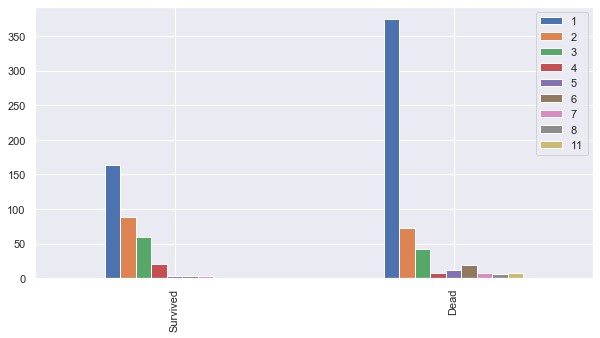

In [341]:
bar_chart('FamilySize')

In [342]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2.0,
                  7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4.0}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [344]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [ ]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train.drop(features_drop, axis=1, inplace=True)
test.drop(features_drop, axis=1, inplace=True)
train.drop('PassengerId', axis=1, inplace=True)

train_data = train.drop('Survived', axis=1)
target = train['Survived']

In [350]:
print(train_data.shape)
print(target.shape)

(891, 8)
(891,)


In [352]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,3.0,2.0,0.8,1,2,0.4
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,2.0,0.8,0,2,0.4
4,0,3,0,2.0,0.0,2.0,0,0,0.0


In [353]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [355]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    object 
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 62.8+ KB


In [356]:
from sklearn.model_selection import cross_val_score

In [410]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=10, n_jobs=1, scoring=scoring)
print(score.mean()*100)


80.25717852684144


In [413]:
clf = DecisionTreeClassifier()
clf.fit(train_data, target)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [414]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [415]:
clf.predict(test_data)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [394]:
Rclf = RandomForestClassifier(n_estimators=24)
scoring = 'accuracy'
score = cross_val_score(Rclf, train_data, target, cv=10, n_jobs=1, scoring=scoring)
print(score.mean()*100)


81.59925093632958


In [380]:
import plotly.graph_objects as go

In [392]:

fig = go.Figure(data=go.Scatter(x=estimators, y=scores))
fig.show()

In [398]:
test_data = test.drop('PassengerId', axis=1).copy()

In [399]:
test_data

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,2.0,0.0,2.0,2,0,0.4
1,3,1,3.0,0.0,2.0,0,2,0.4
2,2,0,3.0,0.0,2.0,2,0,0.0
3,3,0,2.0,0.0,2.0,0,0,0.4
4,3,1,1.0,0.0,2.0,0,2,0.0
...,...,...,...,...,...,...,...,...
413,3,0,2.0,0.0,2.0,0,0,0.0
414,1,1,3.0,3.0,0.8,1,NaN,0.0
415,3,0,3.0,0.0,2.0,0,0,0.0
416,3,0,2.0,0.0,2.0,0,0,0.8


In [407]:
Rclf = RandomForestClassifier(n_estimators=13)
Rclf.fit(train_data, target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=13,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [409]:
prediction = Rclf.predict(test_data)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').